# Likelihood function

## Summary
$$
\Pr(data | \theta)  = \mathcal{L}(\theta | data)
$$


Likelihood is
* the probability that the observed data came from a parameterization.
    * In other words return value of the likelihood, or the height of the likelihood distribution, is the probability the numbers seen come from a model with the parameters

Likelihood is not
* the probability that the parameterization is correct
* a probability distribution function
* (Does not) sum to 1

## An Example
Copied from: https://en.wikipedia.org/wiki/Likelihood_function#Example_1

**If I have coin what is $Pr(\theta)$ if (Heads Heads) is observed?**

$ Pr(data = HH | \theta_h = .5) = .5*.5 =.25$

or 

$ \mathcal{L}(\theta_g | data=HH) =.25$

In [3]:
## Again in scipy stas
import scipy.stats as stats
theta = .5
stats.binom.pmf(k=2, n=2, p=theta)

0.25

If we repeat this again but make the assumption $\theta_h = .3$

Then $ Pr(data = HH | \theta_h= .3) = .03 * .03 = .009$


In [4]:
theta = .03
stats.binom.pmf(k=2, n=2, p=theta)

0.0008999999999999998

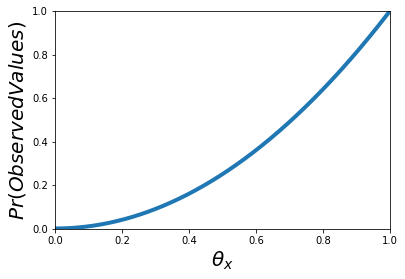

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r'$\theta_x$', fontsize=20)
ax.set_ylabel(r'$Pr(Observed Values)$', fontsize=20)

# Points
theta = np.linspace(0,1,1000)
likelihood = stats.binom.pmf(k=2,n=2, p=theta)
# ax.plot(x=theta, y=likelihood, linestyle='dashed', linewidth=3)
ax.plot(theta, likelihood, linestyle="-", linewidth=4)

## Intuition
Each of these x values corresponds to the y value which is the probability of the data occuring at the given parameter value

For example
* At $\theta_h = 0$ the probability that $\theta_h = 0$ explains two heads is zero because it'd be impossible to observe any heads if the the probability of generating a heads on any one flip is zero

* At $\theta_h = 1$ the probability that this parameter explains two heads is 1 because only heads can be generated. It's guaranteed that it happens

### Not a probability distribution
The integral of the above plot is .3. 

**Source:**
https://en.wikipedia.org/wiki/Likelihood_function

In [6]:
# Numerical Validation
# .001 is the width of each step (1/1000)
np.sum(.001*likelihood)

0.3335001668335002

## An alternative formulation
Let's say that we then flip the coin again and a tails comes up. This means that the probability of the parameter $\theta_h=1$ must be zero because this is impossible, we just observed a tails.


In [10]:
theta = np.linspace(0,1,1000)
stats.binom.pmf(k=2, n=3, p=1)

0.0

This can be viewed graphically as well

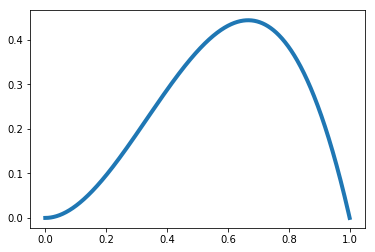

In [12]:
likelihood = stats.binom.pmf(k=2, n=3, p=theta)
fig, ax = plt.subplots()
ax.plot(theta, likelihood, linestyle="-", linewidth=4)